# Number of Orders Prediction using Python

### I will be using the sales data of supplements that have been collected from Kaggle. The data that I will be using for the task of the number of orders prediction contains data about:

##### Product ID
##### Store ID
##### The type of store where the supplement was sold
##### The type of location the order was received from
##### Sales Date
##### Region code
##### Whether it is a public holiday or not at the time of order
##### Whether the product was on discount or not
##### Number of orders placed
##### Sales


In [49]:
import pandas as pd
import numpy as np
data = pd.read_csv("supplement.csv")
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [51]:
data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [23]:
data.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


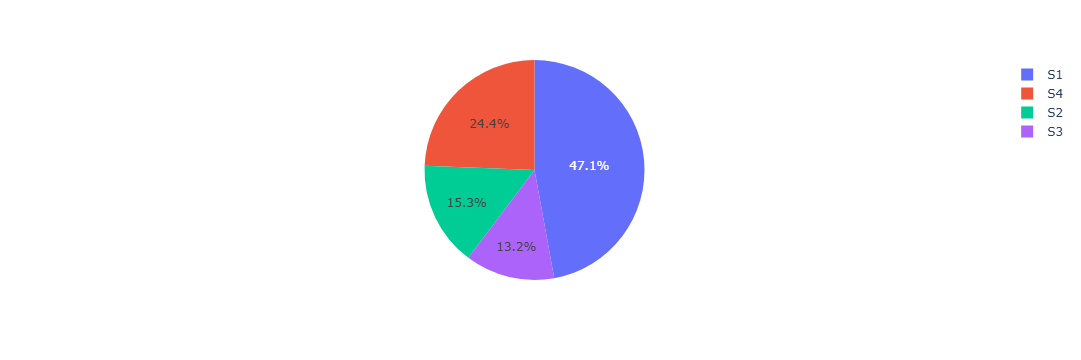

In [52]:
import plotly.express as px
pie = data["Store_Type"].value_counts()
df = pie.reset_index()
df.columns = ['Store_Type', 'Orders']

fig = px.pie(df, values='Orders', names='Store_Type')
fig.show()


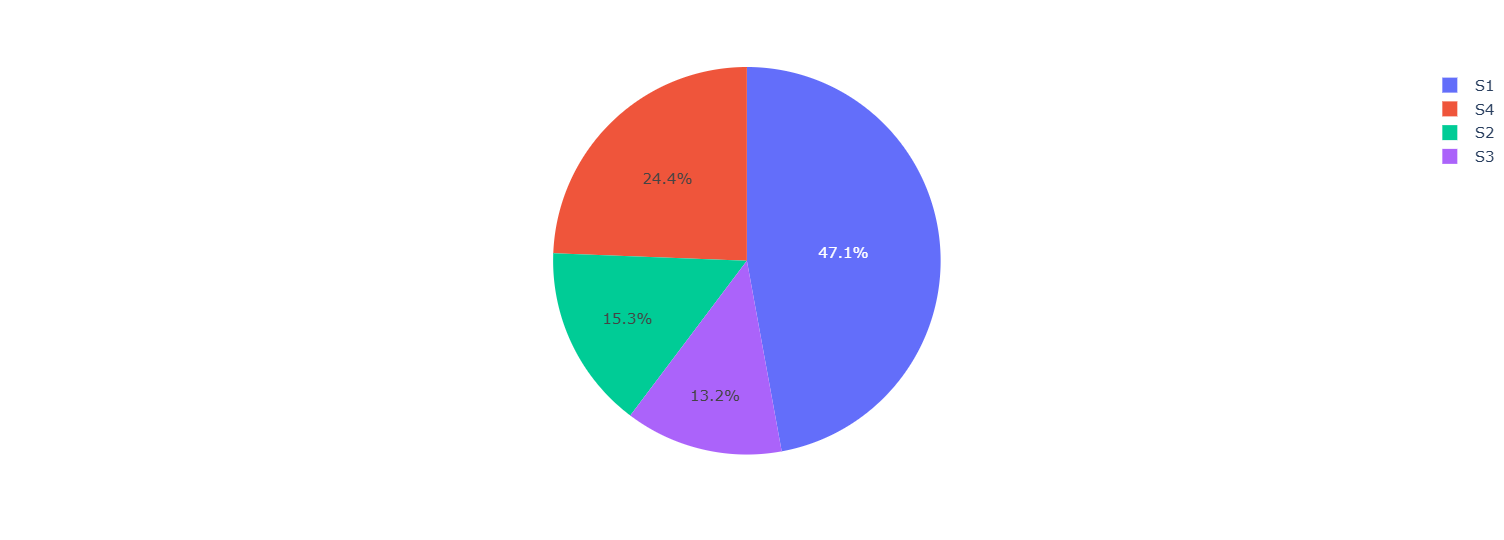

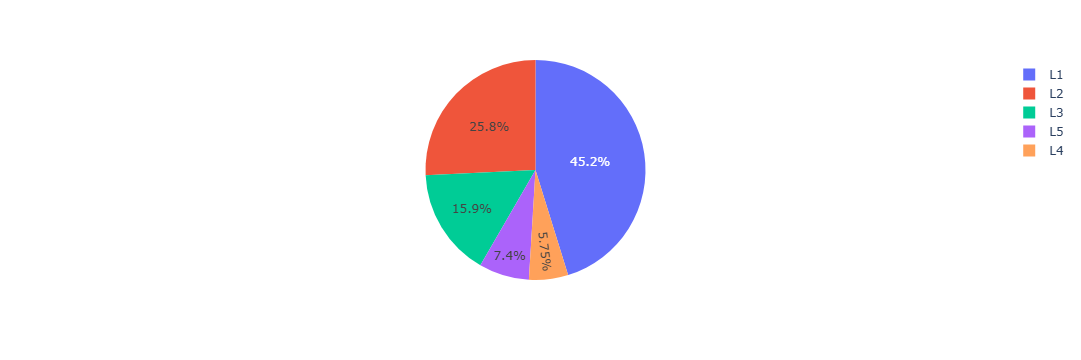

In [53]:
pie2 = data["Location_Type"].value_counts()
df = pie2.reset_index()
df.columns = ['Location_Type', 'Orders']

fig = px.pie(df, values='Orders', names='Location_Type')
fig.show()


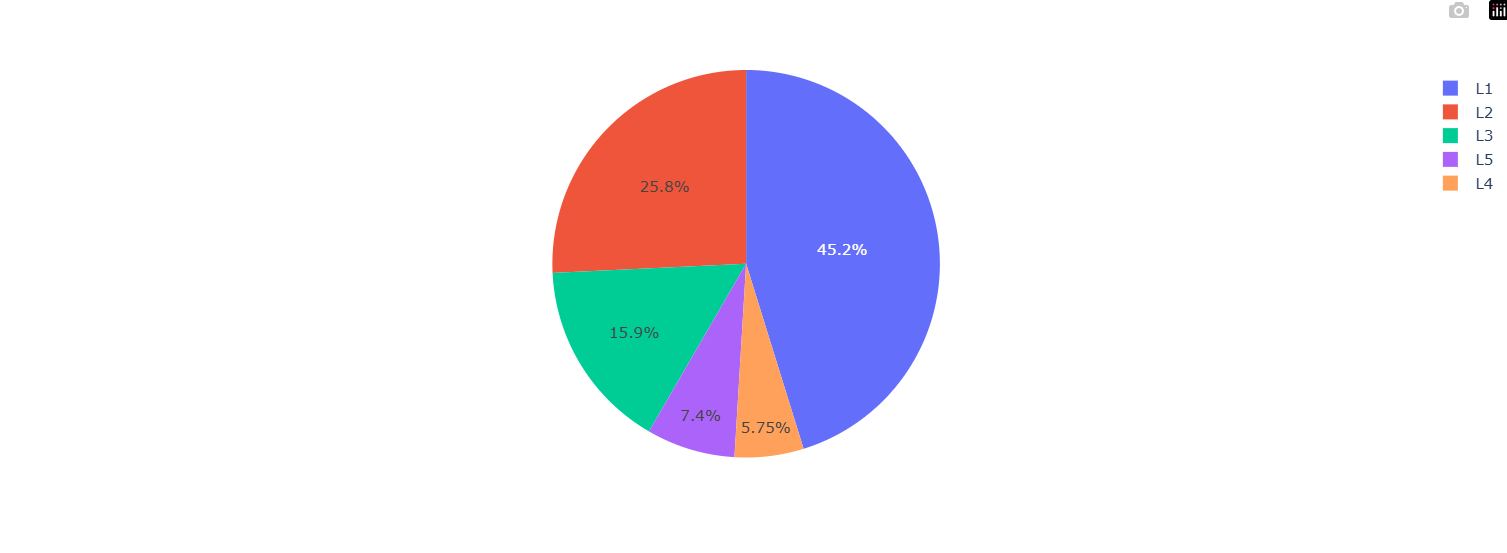

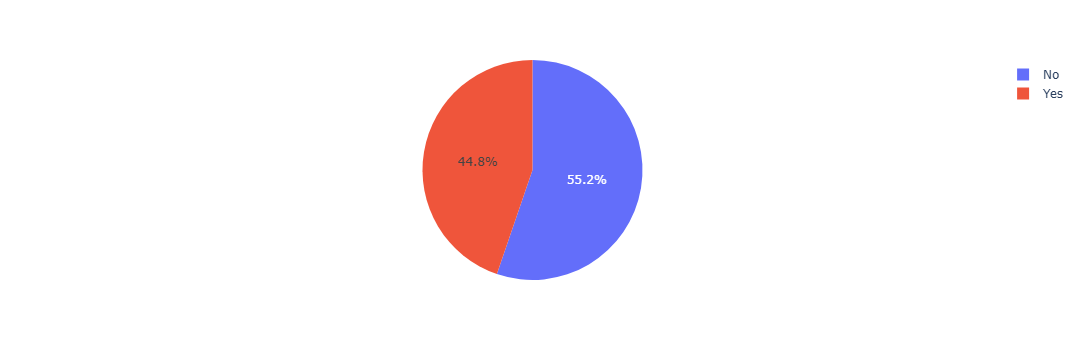

In [54]:
pie3 = data["Discount"].value_counts()
df = pie3.reset_index()
df.columns = ['Discount', 'Orders']

fig = px.pie(df, values='Orders', names='Discount')
fig.show()


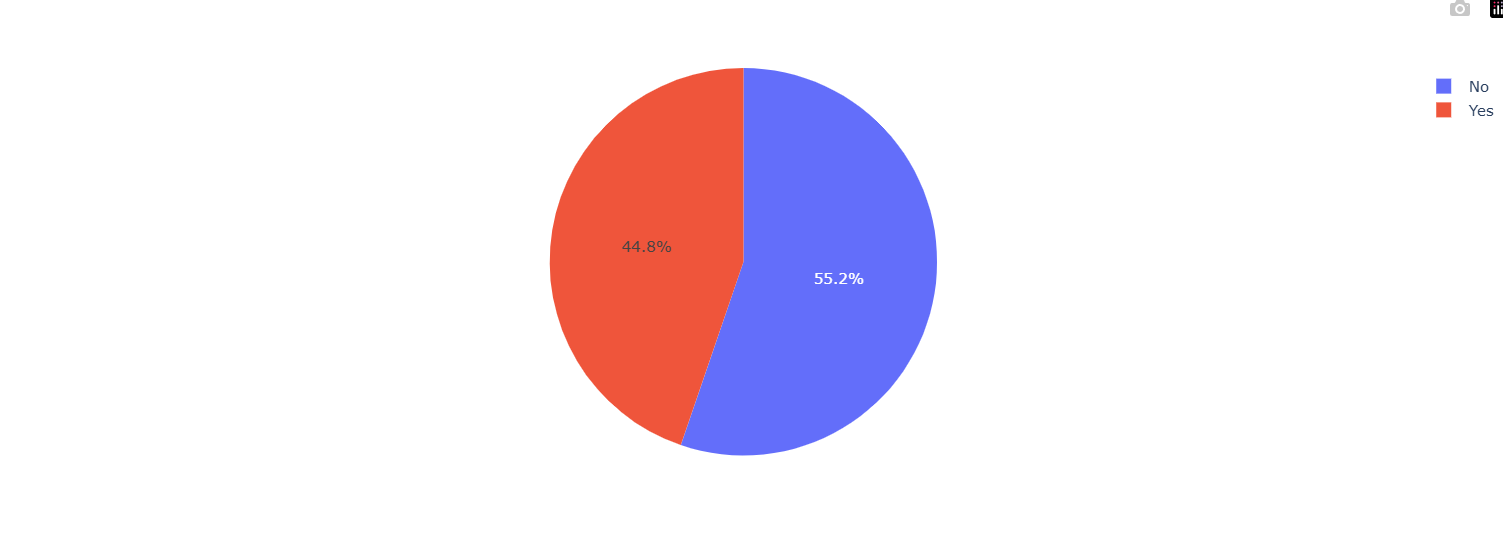

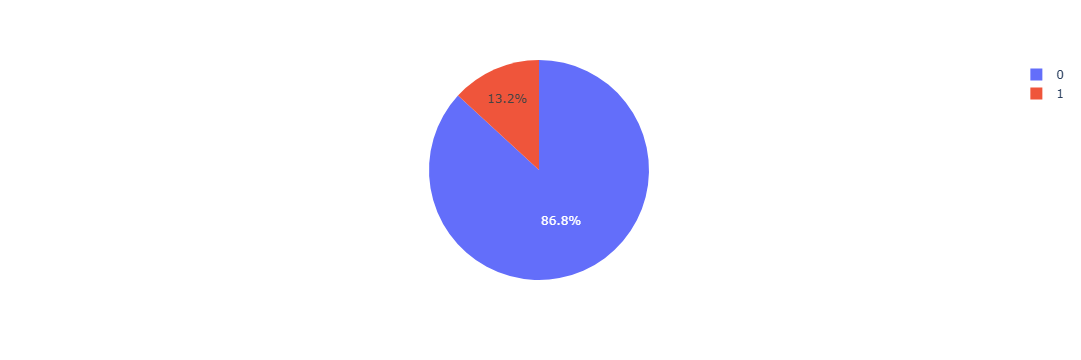

In [58]:
pie4 = data["Holiday"].value_counts()
df = pie4.reset_index()
df.columns = ['Holiday', 'Orders']

fig = px.pie(df, values='Orders', names='Holiday')
fig.show()


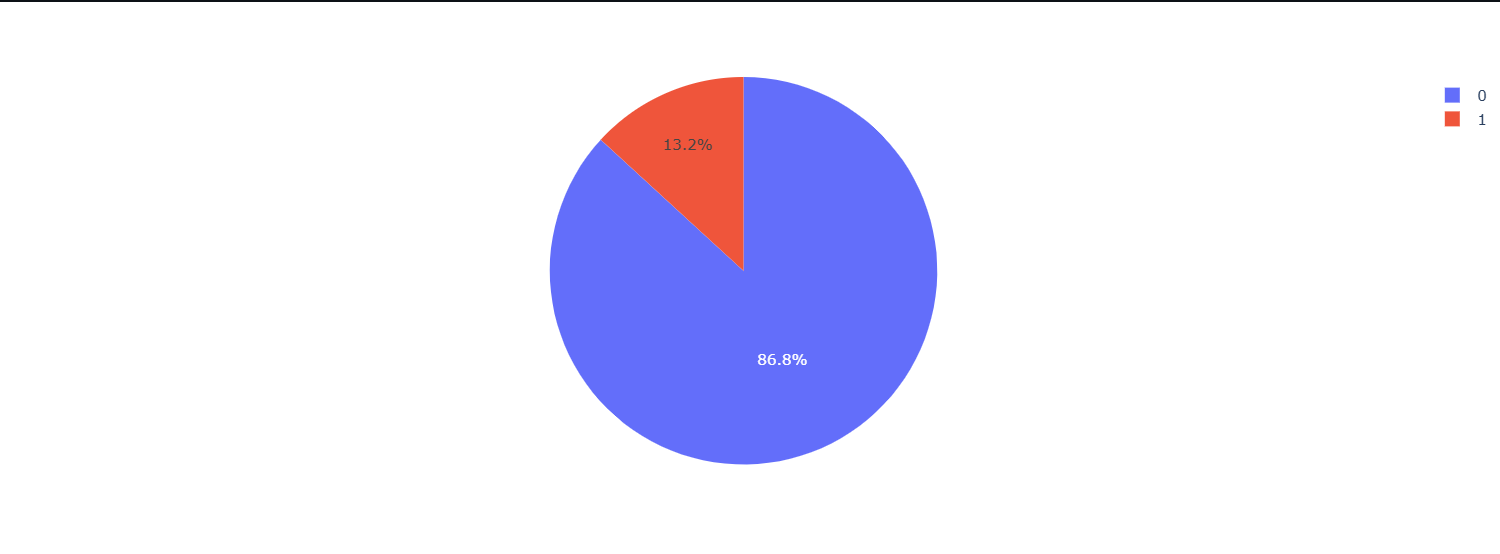

# Number of Orders Prediction Model


In [59]:
print("data" in globals())


True


In [60]:
data["Discount"] = data["Discount"].map({"No": 0, "Yes": 1})
data["Store_Type"] = data["Store_Type"].map({"S1": 1, "S2": 2, "S3": 3, "S4": 4})
data["Location_Type"] = data["Location_Type"].map({"L1": 1, "L2": 2, "L3": 3, "L4": 4, "L5": 5})
data = data.dropna()

x = data[["Store_Type", "Location_Type", "Holiday", "Discount"]] 
y = np.array(data["#Order"])

In [61]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42)

In [62]:
import lightgbm as ltb
model = ltb.LGBMRegressor()
model.fit(xtrain, ytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 150672, number of used features: 4
[LightGBM] [Info] Start training from score 68.163401


LGBMRegressor()

In [63]:
ypred = model.predict(xtest)
predicted_orders = pd.DataFrame({"Predicted Orders": ypred.flatten()})
print(predicted_orders.head())


   Predicted Orders
0         47.351897
1         97.068717
2         66.577788
3         85.143083
4         54.451098


In [33]:
comparison = pd.DataFrame({
    "Actual Orders": ytest.flatten(),
    "Predicted Orders": ypred.flatten()
})
print(comparison.head())


   Actual Orders  Predicted Orders
0             54         47.351897
1            111         97.068717
2             59         66.577788
3             67         85.143083
4             60         54.451098
